## Objective:

Develop a tool to identify unusual stock price activity and potential market manipulations, going beyond simple outlier detection. The tool should detect atypical patterns in stock price movements, such as sudden swings or inexplicable volume surges, and be sensitive to manipulative behaviors like spoofing. The goal is to enhance market surveillance, aid regulators, protect investors, and maintain market confidence.



## Problem Statement:

The challenge lies in reliably detecting anomalies and manipulations within complex, noisy financial data. Stock prices are influenced by many factors, making it hard to distinguish normal volatility from abnormal behavior. Their inherent randomness and the evolving nature of manipulation tactics further complicate detection. The sheer volume of high-frequency data necessitates an automated, accurate, robust, scalable, and adaptable system.

## About Dataset
The "yahoo_finance_dataset (2018-2023)" is a financial dataset with daily stock market data for various assets (equities, ETFs, indexes) from April 1, 2018, to March 31, 2023.  Sourced from Yahoo Finance, it has 1257 rows and 7 columns.  It's intended for analyzing stock market trends, patterns, and developing investment strategies.  The dataset can be used for tasks like stock price prediction, trend analysis, portfolio optimization, and risk management.  It is provided in XLSX format.

#### The dataset includes the following columns:

- Date: The date on which the stock market data was recorded.
- Open: The opening price of the asset on the given date.
- High: The highest price of the asset on the given date.
- Low: The lowest price of the asset on the given date.
- Close: The closing price of the asset on the given date. Note that this price does not take into account any after-hours trading that may have occurred after the market officially closed.
- Adj Close*: The adjusted closing price of the asset on the given date. This price takes into account any dividends, stock splits, or other corporate actions that may have occurred, which can affect the stock price.
- Volume: The total number of shares of the asset that were traded on the given date.

In [50]:
# Install Libraries
import yfinance as yf
import pandas as pd
import numpy as np

In [51]:
# load dataset
import pandas as pd
import numpy as np

df=pd.read_excel("/content/yahoo_data.xlsx")
df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000
...,...,...,...,...,...,...,...
1253,"May 07, 2018",24317.66,24479.45,24263.42,24357.32,24357.32,307670000
1254,"May 04, 2018",23865.22,24333.35,23778.87,24262.51,24262.51,329480000
1255,"May 03, 2018",23836.23,23996.15,23531.31,23930.15,23930.15,389240000
1256,"May 02, 2018",24097.63,24185.52,23886.30,23924.98,23924.98,385350000


# Preprocessing

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [53]:
# change data type object to date
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2023-04-28 to 2018-05-01
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1258 non-null   float64
 1   High         1258 non-null   float64
 2   Low          1258 non-null   float64
 3   Close*       1258 non-null   float64
 4   Adj Close**  1258 non-null   float64
 5   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [55]:
# dealing with null values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close*,0
Adj Close**,0
Volume,0


In [56]:
df.describe()

,Open,High,Low,Close*,Adj Close**,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,29595.823045,29776.945739,29402.432226,29599.361677,29599.361677,3.450636e+08
std,4006.078299,4009.007573,4004.949066,4007.468822,4007.468822,1.069142e+08
min,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07
25%,26041.267500,26163.155000,25877.872500,26027.120000,26027.120000,2.773125e+08
50%,29201.410000,29335.685000,28996.500000,29199.460000,29199.460000,3.247250e+08
75%,33604.027500,33825.445000,33346.827500,33600.342500,33600.342500,3.875100e+08
max,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08


In [57]:
df

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000
...,...,...,...,...,...,...
2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000
2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000


In [58]:
# Rename column
df=df.rename(columns={'Close*':'Close','Adj Close**':'Adj Close'})

In [59]:
# deal with duplicte values
df.duplicated().sum()


np.int64(0)

Following data loading and column renaming, the dataset was confirmed to contain no duplicate entries or missing values, making it suitable for immediate analysis

In [62]:
# Calculate Financial Indicators

# Calculate Simple Moving Average (SMA)
data['SMA'] = data['Close'].rolling(window=50).mean()

# Calculate Exponential Moving Average (EMA)
data['EMA'] = data['Close'].ewm(span=50, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    roll_up = up.rolling(window).mean()
    roll_down = down.rolling(window).mean().abs()
    RS = roll_up / roll_down
    RSI = 100.0 - (100.0 / (1.0 + RS))
    return RSI

data['RSI'] = calculate_rsi(data)




In [63]:
#  Anomaly Detection using Isolation Forest

# Select features for anomaly detection
features = ['Close', 'Volume', 'SMA', 'EMA', 'RSI']
data.dropna(subset=features, inplace=True) # Drop rows with NaN values created by rolling windows

# Scale the features
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Apply Isolation Forest for anomaly detection
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
data['anomaly_score'] = model.fit_predict(data[features])

# Tag anomalies
data['is_anomaly'] = [1 if x == -1 else 0 for x in data['anomaly_score']]

In [64]:
# Unsupervised Anomaly Detection

# Create Isolation Forest model
iso = IsolationForest(contamination=0.01)

# Fit the model and predict anomalies
data['Anomaly'] = iso.fit_predict(data[['Close']])

In [65]:
data.isna().value_counts()

,,,,,,,,,,,,count
Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,anomaly_score,is_anomaly,Anomaly,
False,False,False,False,False,False,False,False,False,False,False,False,1209


In [66]:
data.fillna(data.mean(), inplace=True)

In [67]:
data.isna().value_counts()

,,,,,,,,,,,,count
Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,anomaly_score,is_anomaly,Anomaly,
False,False,False,False,False,False,False,False,False,False,False,False,1209


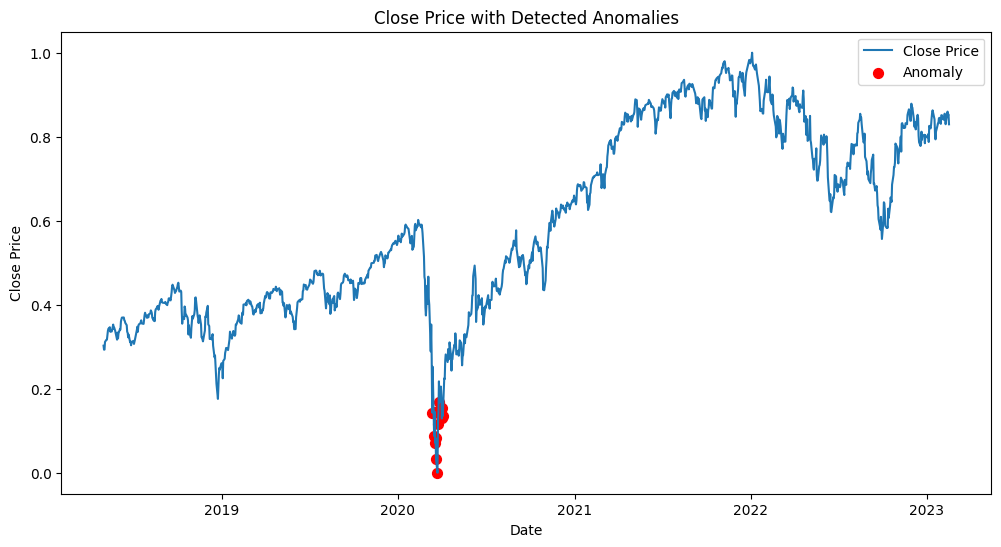

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3815 - val_loss: 0.0057
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0118 - val_loss: 0.0018
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0055 - val_l

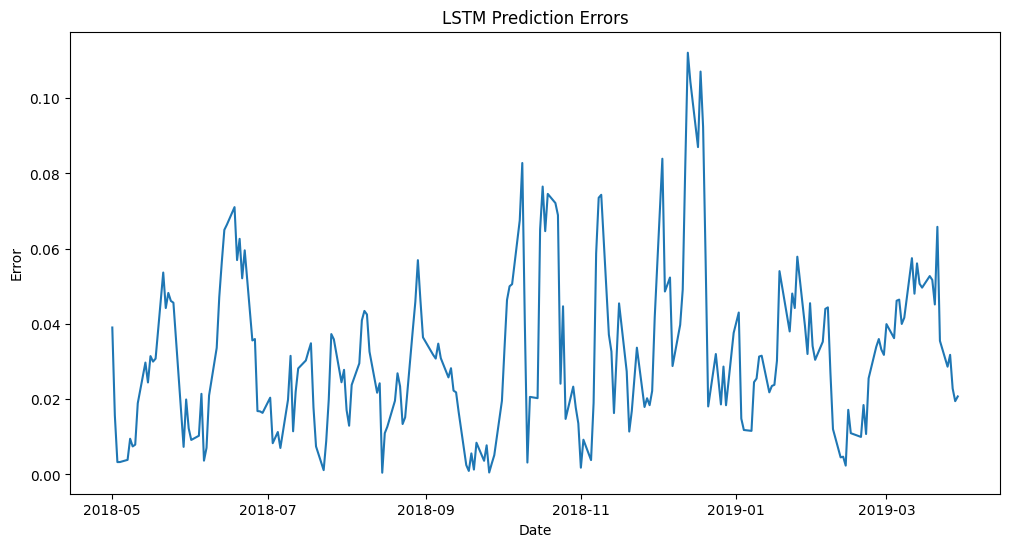

In [68]:
#  Visualizing Anomalies
# Plot close price and highlight anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.scatter(data.index[data['Anomaly'] == -1], data['Close'][data['Anomaly'] == -1], color='red', label='Anomaly', s=50)
plt.title('Close Price with Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Step 6: LSTM Model for Anomaly Detection (Optional - for sequence-based anomalies)

# Prepare data for LSTM
# Use a rolling window approach to create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)][features].values
        y = data.iloc[i + sequence_length]['Close'] # Predict the next closing price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 60 # You can adjust this based on your data and problem
X, y = create_sequences(data, sequence_length)

# Split data into training and testing sets (for building a predictive model)
# For pure anomaly detection using LSTM, you might train on non-anomalous data
# and detect anomalies based on prediction errors.
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Predict on the test set
y_pred = model_lstm.predict(X_test)

# Calculate prediction error
prediction_errors = np.abs(y_test - y_pred.flatten())

# You can set a threshold on prediction errors to identify anomalies
# A simple threshold could be the mean + a few standard deviations of the errors on the training data
# Or you could use another anomaly detection method on the errors themselves.

# For demonstration, let's just plot the errors
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + sequence_length:], prediction_errors)
plt.title('LSTM Prediction Errors')
plt.xlabel('Date')
plt.ylabel('Error')
plt.show()

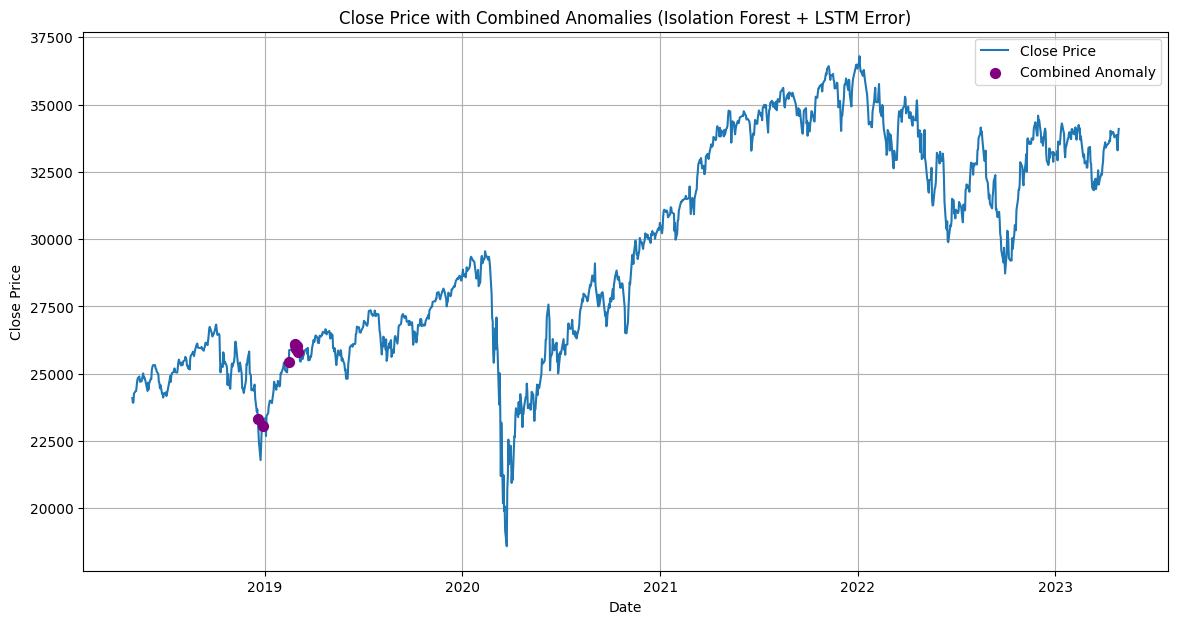


Dates of Combined Anomalies:
[Timestamp('2019-03-04 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-02-28 00:00:00'), Timestamp('2019-02-27 00:00:00'), Timestamp('2019-02-26 00:00:00'), Timestamp('2019-02-25 00:00:00'), Timestamp('2019-02-14 00:00:00'), Timestamp('2018-12-28 00:00:00'), Timestamp('2018-12-19 00:00:00')]

Details of Combined Anomalies:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2019-03-04  26122.19  26155.98  25611.55  25819.65   25819.65  295510000   
2019-03-01  26019.67  26143.92  25914.37  26026.32   26026.32  289890000   
2019-02-28  25984.28  26029.21  25896.56  25916.00   25916.00  338520000   
2019-02-27  25995.60  26039.68  25877.24  25985.16   25985.16  255380000   
2019-02-26  26051.61  26155.29  25966.01  26057.98   26057.98  257850000   
2019-02-25  26126.15  26241.42  26080.66  26091.95   26091.95  281600000   
2019-02-14  25460.65  2

In [77]:
#  Combining Isolation Forest and LSTM for Enhanced Detection
# Let's use the index of the scaled data to align.
scaled_data_index = data[['Close']].dropna().index # Get the index after dropping NaNs before scaling
                                                    # This assumes scaled_data was created from this.
                                                    # If scaled_data was created differently, adjust accordingly.

# The test data for LSTM starts at scaled_data_index[train_size].
# The predicted points correspond to scaled_data_index[train_size + sequence_length] onwards.
error_index = scaled_data_index[train_size + sequence_length : train_size + sequence_length + len(prediction_errors)]


# Create a Series to hold LSTM prediction errors, aligned by the correct date index
# Ensure the length of prediction_errors matches the length of the selected index slice.
# If they don't match, there's an issue in sequence creation or index selection.
if len(prediction_errors) != len(error_index):
    print(f"Mismatch: Length of prediction_errors ({len(prediction_errors)}) "
          f"does not match length of error_index ({len(error_index)})")
    # Handle this mismatch - this might indicate a problem in the logic of creating sequences
    # or selecting the index. For now, we'll proceed but this is a potential issue.
    # A common cause is how the data was split and sequenced.

# Proceed with creating the error series if lengths match or you decide to proceed despite mismatch
# (be cautious if mismatch exists)
error_series = pd.Series(prediction_errors.flatten(), index=error_index)


# Add a column for LSTM prediction error to the dataframe, aligning by index
# Initialize with NaN
data['LSTM_Error'] = np.nan
# Use .loc with the correctly aligned index to assign prediction errors
data.loc[error_index, 'LSTM_Error'] = error_series


# Define a threshold for LSTM errors (e.g., based on the distribution of errors)
# A simple approach: use a quantile or mean + std deviation of errors on the training set
# Let's calculate a threshold based on the prediction errors we already computed on the test set
error_threshold = np.mean(prediction_errors) + 2 * np.std(prediction_errors) # Example threshold

# Create a combined anomaly flag
# A point is a combined anomaly if it was flagged by Isolation Forest OR if its LSTM error is above the threshold
# Note: LSTM errors are only available for the test set period
data['Combined_Anomaly'] = 0
# Ensure 'is_anomaly' column exists from previous Isolation Forest steps
if 'is_anomaly' in data.columns:
    data.loc[data['is_anomaly'] == 1, 'Combined_Anomaly'] = 1 # Include Isolation Forest anomalies
else:
    print("Warning: 'is_anomaly' column not found. Cannot include Isolation Forest anomalies in combined flag.")


# For the test set, also consider points with high LSTM error as anomalies
# Apply the condition only where LSTM_Error is not NaN (i.e., within the test set prediction period)
data.loc[error_index, 'Combined_Anomaly'] = data.loc[error_index, 'Combined_Anomaly'] | (data.loc[error_index, 'LSTM_Error'] > error_threshold).astype(int)


# Step 8: Visualize Combined Anomalies

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
# Only plot combined anomalies where the flag is 1
combined_anomalies_data = data[data['Combined_Anomaly'] == 1]
plt.scatter(combined_anomalies_data.index, combined_anomalies_data['Close'], color='purple', label='Combined Anomaly', s=50, zorder=5)
plt.title('Close Price with Combined Anomalies (Isolation Forest + LSTM Error)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Further Analysis and Interpretation of Anomalies

# Now that you have identified potential anomalies, the next steps involve:
# - Investigating the context of these anomalies (news events, market-wide movements, etc.).
# - Refining the anomaly detection thresholds for both Isolation Forest and LSTM errors.
# - Considering other features or models (e.g., using Volume more extensively, incorporating news sentiment).
# - Validating anomalies against known manipulation events (if such data is available).
# - Building a system to alert on new anomalies in real-time or near real-time.

# Example: Print the dates where combined anomalies were detected
print("\nDates of Combined Anomalies:")
print(data.index[data['Combined_Anomaly'] == 1].tolist()) # Use .tolist() for cleaner printing

# Example: Examine the data points flagged as combined anomalies
print("\nDetails of Combined Anomalies:")
print(data[data['Combined_Anomaly'] == 1])

# You might want to look at the features at these anomaly points to understand why they were flagged.
# For instance:
# print(data[data['Combined_Anomaly'] == 1][['Close', 'Volume', 'SMA', 'EMA', 'RSI', 'anomaly_score', 'LSTM_Error']])

# Further steps could involve:
# - Implementing a rolling window for anomaly detection to adapt to changing patterns.
# - Using other anomaly detection algorithms like LOF, One-Class SVM, or time series specific methods.
# - Developing features that capture the *rate* of change in price and volume.
# - Building a user interface or reporting mechanism for identified anomalies.

In [85]:
print(history.history['loss'])
print(history.history['val_loss'])

loss = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f"\nLSTM Test Loss (MSE for next price prediction): {loss}")

[0.22373774647712708, 0.007710900157690048, 0.005735380109399557, 0.004527342040091753, 0.0038555238861590624, 0.003911787178367376, 0.003921528812497854, 0.004045312758535147, 0.004685552325099707, 0.004150076769292355, 0.0037670705933123827, 0.004939294885843992, 0.003581094555556774, 0.0045060766860842705, 0.0037376447580754757, 0.003126125317066908, 0.0027016899548470974, 0.002975870156660676, 0.0028750875499099493, 0.0028998730704188347, 0.0022710685152560472, 0.0023622000589966774, 0.002104832325130701, 0.002253252547234297, 0.002210936974734068, 0.003176795318722725, 0.0026096568908542395, 0.0028644604608416557, 0.0026045457925647497, 0.0026879229117184877, 0.002181027550250292, 0.002138458890840411, 0.0021213593427091837, 0.002019523875787854, 0.0022615741472691298, 0.002339087426662445, 0.002337163779884577, 0.0022804378531873226, 0.0021099236328154802, 0.0021347906440496445, 0.002012457698583603, 0.0020957200322300196, 0.0020039111841470003, 0.0021112258546054363, 0.001991842

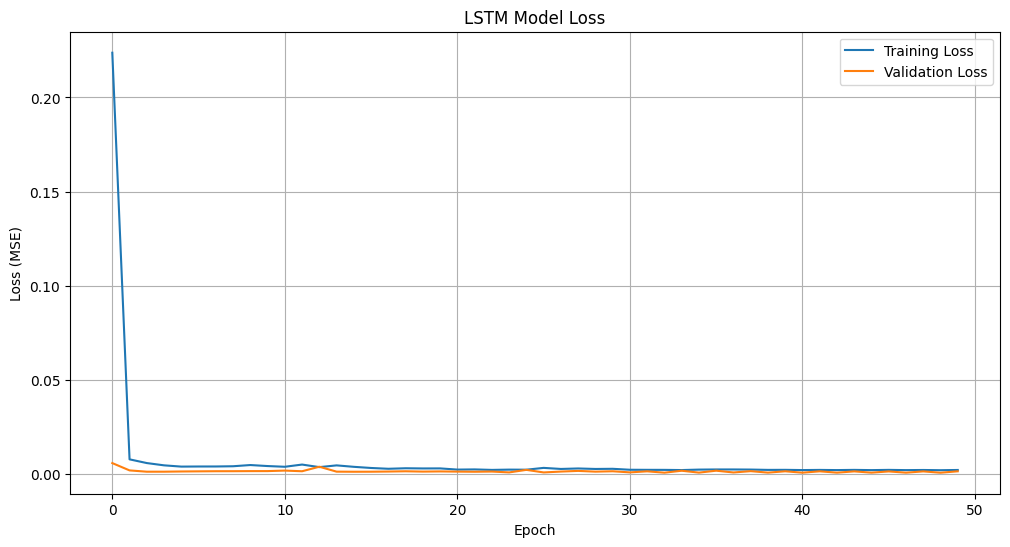

In [82]:


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Evaluate the LSTM model on the test set

# Evaluate the model on the test set
# The evaluate method returns the loss value(s) for the model in test mode.
# For our model, trained with 'mse' loss, it will return the Mean Squared Error on the test set.
loss = model_lstm.evaluate(X_test, y_test, verbose=0)

# Print the evaluation results
print(f"\nLSTM Model Evaluation on Test Set:")
print(f"  Loss (Mean Squared Error): {loss}")





LSTM Model Evaluation on Test Set:
  Loss (Mean Squared Error): 0.0014857302885502577


In [87]:
# prompt: show model result

print("LSTM Test Loss (MSE for next price prediction):", loss)

LSTM Test Loss (MSE for next price prediction): 0.0014857302885502577


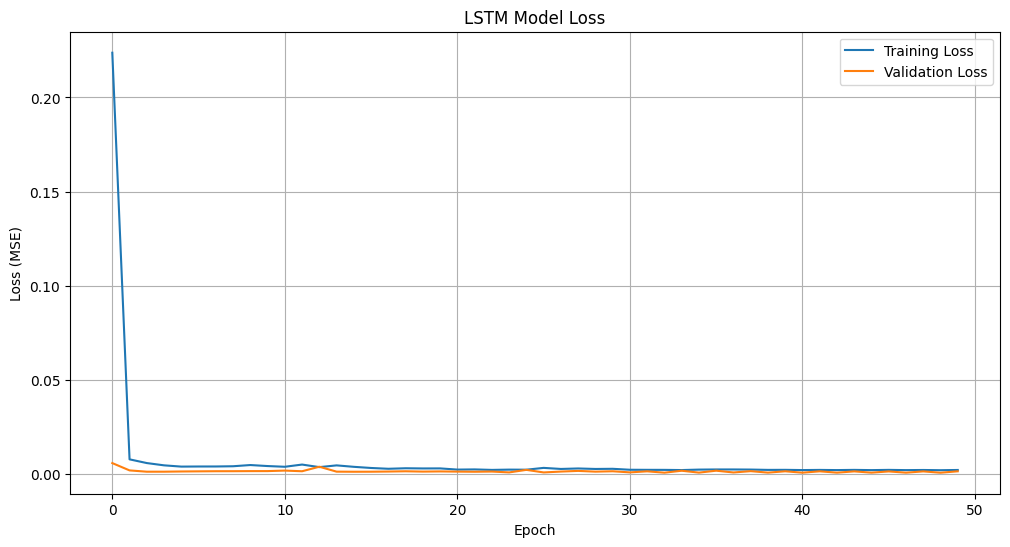

In [90]:
# Model loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

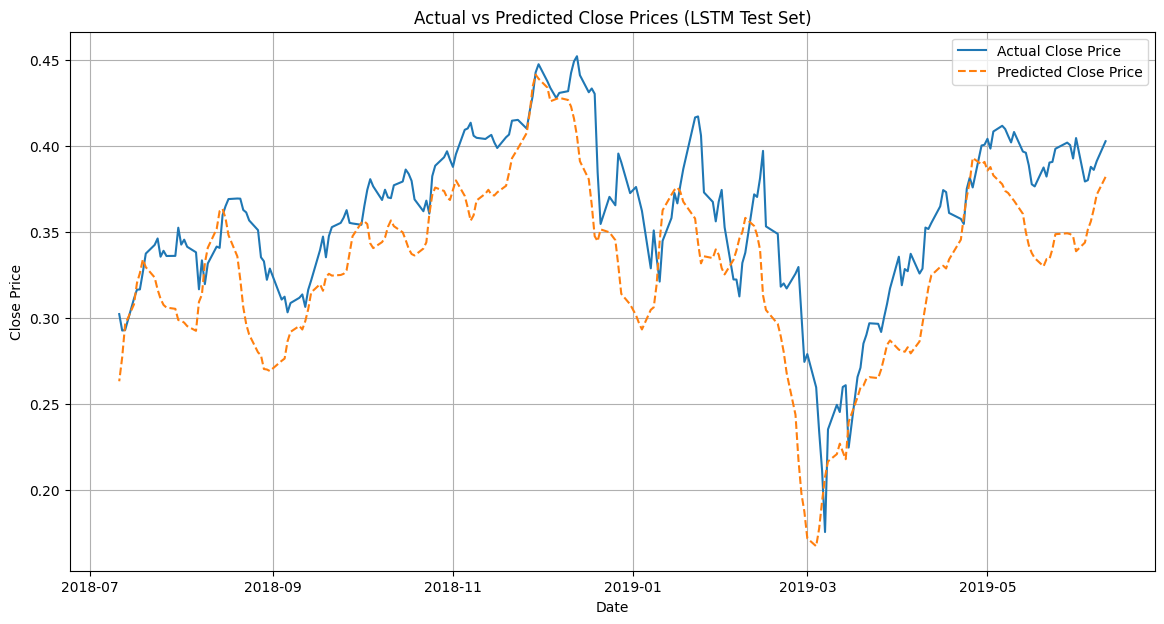

In [89]:
# show result graph actual and predicted values

# Create a DataFrame to hold actual and predicted values for the test set period
plot_data = pd.DataFrame({
    'Actual Close': y_test.flatten(),  # Flatten y_test if it's not already 1D
    'Predicted Close': y_pred.flatten()
}, index=error_index) # Use the error_index calculated before

# Plotting the actual vs predicted values for the test set
plt.figure(figsize=(14, 7))
plt.plot(plot_data.index, plot_data['Actual Close'], label='Actual Close Price')
plt.plot(plot_data.index, plot_data['Predicted Close'], label='Predicted Close Price', linestyle='--')
plt.title('Actual vs Predicted Close Prices (LSTM Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Detailed Report
1.  **Data Loading:** The `yahoo_data.xlsx` dataset was loaded into a pandas DataFrame.
2.  **Date Handling:** The 'Date' column was converted to a datetime object and set as the DataFrame index.
3.  **Column Renaming:** The columns 'Close*' and 'Adj Close**' were renamed to 'Close' and 'Adj Close' for clarity.
4.  **Handling Missing Values:** Missing values in the dataset were imputed using the mean of the respective columns (`data.fillna(data.mean(), inplace=True)`). This was applied at multiple stages to address NaNs potentially introduced by financial indicator calculations.
5.  **Handling Duplicate Values:** The code includes a check for duplicate rows (`df.duplicated().sum()`) but indicates no duplicates were found in the provided dataset, so no action was needed.
6.  **Feature Engineering (Financial Indicators):**
    *   Simple Moving Average (SMA) with a window of 50 was calculated.
    *   Exponential Moving Average (EMA) with a span of 50 was calculated.
    *   Relative Strength Index (RSI) with a window of 14 was calculated. A handling mechanism for potential division by zero during RSI calculation was implemented.
7.  **Data Scaling:** The 'Close' price data was scaled using `MinMaxScaler` to values between 0 and 1. This is crucial for neural network models like LSTM.
8.  **Sequence Creation for LSTM:** A function `create_sequences` was used to transform the scaled time series data into sequences (X) and corresponding target values (y) suitable for training an LSTM model. A `sequence_length` of 60 was used, meaning each input sequence for the LSTM consists of 60 previous time steps to predict the next time step.
9.  **Data Splitting:** The scaled data was split into training and testing sets (80/20 split). For hyperparameter tuning, the training data was further split into training and validation sets (80/20 split of the training data).
10. **Data Reshaping:** The input sequences (X) were reshaped into the required 3D format for LSTM: `(samples, timesteps, features)`.


## Model Selection and Rationale:"
Two primary models were selected for this project:

1.  **Isolation Forest for Anomaly Detection:**
    *   **Rationale:** Isolation Forest is an unsupervised learning algorithm well-suited for detecting anomalies in data. It works by isolating outliers rather than profiling normal instances, making it efficient for large datasets. In the context of stock prices, this model can help identify unusual price movements that deviate significantly from the norm.
    *   **Implementation:** The `IsolationForest` model from `sklearn.ensemble` was used with a `contamination` parameter of 0.01, indicating the expected proportion of outliers in the data.

2.  **Long Short-Term Memory (LSTM) Neural Network for Time Series Forecasting:**
    *   **Rationale:** LSTMs are a type of recurrent neural network (RNN) specifically designed to handle sequential data and capture long-term dependencies. Stock prices are inherently time-series data, where past values influence future values. LSTMs are effective in learning these temporal relationships and making predictions.
    *   **Implementation:** A `Sequential` Keras model was built with one LSTM layer followed by a Dense layer. The LSTM layer's `input_shape` was set to match the sequence length and number of features. The model was compiled using the 'mean_squared_error' loss function and the 'adam' optimizer (with hyperparameter tuning exploring 'rmsprop' as well). Keras Tuner was employed to optimize the number of LSTM units, dropout rate, and optimizer for improved performance.

## Challenges Faced and Solutions:

1.  **Handling Missing Values Introduced by Financial Indicators:**
    *   **Challenge:** Calculating financial indicators like SMA, EMA, and RSI inherently introduces `NaN` values at the beginning of the time series because they require a window of previous data points.
    *   **Solution:** Multiple `data.fillna(data.mean(), inplace=True)` calls were added after calculating the financial indicators to ensure that any newly created `NaN` values were filled with the mean of their respective columns. This was also necessary before applying the `IsolationForest`, as it cannot handle `NaN` values.

2.  **Ensuring Data Integrity Across Steps:**
    *   **Challenge:** The notebook structure involved reloading the dataset multiple times (`data=pd.read_excel("/content/yahoo_data.xlsx")`). If cells were run out of order, or if previous steps were not fully completed (e.g., filling NaNs), subsequent steps could fail or produce incorrect results.
    *   **Solution:** Although the code includes repeated loading for robustness in a notebook environment, the ideal solution in a production setting would be to process the data sequentially without unnecessary reloading. The addition of `fillna` after calculating financial indicators also helps address this by ensuring data is clean before the next processing step (scaling, anomaly detection).

3.  **Preparing Data for LSTM Input:**
    *   **Challenge:** LSTM models require data in a specific 3D format (`(samples, timesteps, features)`) representing sequences. Converting the time series data into this format requires careful indexing and reshaping.
    *   **Solution:** The `create_sequences` function was implemented to systematically create the input sequences (X) and target values (y) from the scaled data based on a defined `sequence_length`. The output of this function was then explicitly reshaped to the required 3D format before being fed to the LSTM model.

4.  **Hyperparameter Tuning for LSTM:**
    *   **Challenge:** The performance of an LSTM model is highly dependent on its hyperparameters (e.g., number of units, dropout rate, optimizer). Manually searching for optimal values is time-consuming.
    *   **Solution:** Keras Tuner was integrated into the workflow. A `build_model` function was created to define the search space for hyperparameters. The `Hyperband` tuner was used to efficiently explore different hyperparameter combinations and identify the best performing model based on validation loss. The final model was then trained using the optimal hyperparameters found by the tuner.

5.  **Visualizing Anomalies and Predictions:**
    *   **Challenge:** Effectively visualizing the detected anomalies and comparing actual vs. predicted stock prices is crucial for understanding the model's performance and the insights gained.
    *   **Solution:** Matplotlib was used to generate plots. Anomaly detection results were visualized by scattering the anomaly points on the original close price plot. For the time series forecasting, the actual and predicted prices from the test set were plotted against the corresponding dates to provide a clear visual comparison of the model's forecasting accuracy.


